In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft, fftfreq

# A single sine / cosine function

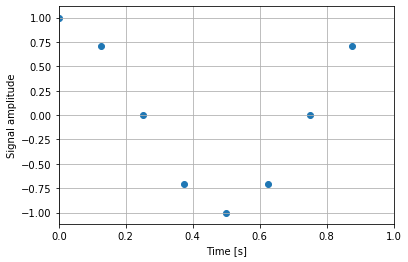

In [2]:
f = 1       # Frequency
f_s = 4   # Sampling rate: measurements per second

t = np.linspace(0, 1, 2*f_s, endpoint=False)
x = np.cos(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.scatter(t, x)
ax.grid()
ax.set_xlim(0,1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

## The Fast Fourier Transform

In [3]:
X = fft(x)
print(X)

[-3.44509285e-16+0.00000000e+00j  4.00000000e+00-6.89018570e-16j
  1.22464680e-16+0.00000000e+00j  0.00000000e+00+2.28847549e-17j
  9.95799250e-17+0.00000000e+00j  0.00000000e+00+1.99159850e-16j
  1.22464680e-16+0.00000000e+00j  4.00000000e+00+4.66973965e-16j]


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

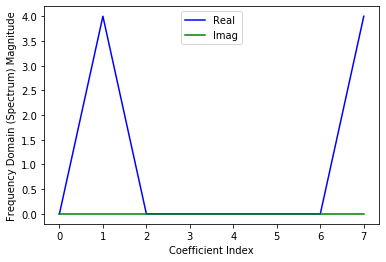

In [4]:
fig, ax = plt.subplots()
ax.plot(X.real,c="b", label="Real")
ax.plot(X.imag,c="g", label="Imag")
ax.legend(loc=0)

ax.set_xlabel('Coefficient Index')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')


In [5]:
x_inv = ifft(X)

/home/filipo/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


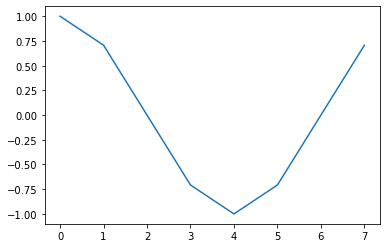

In [6]:
plt.plot(x_inv)

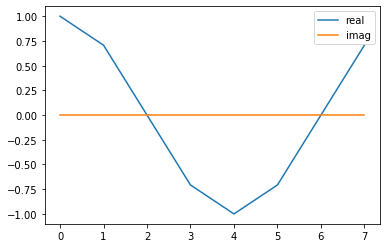

In [7]:
plt.plot(x_inv.real, label="real" )
plt.plot(x_inv.imag, label="imag" )
plt.legend(loc=0)

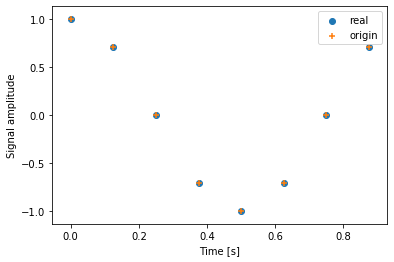

In [8]:
plt.scatter(t, x_inv.real, label="real" )
plt.scatter(t, x, label="origin", marker="+" )
plt.legend(loc=0)
plt.xlabel('Time [s]')
plt.ylabel('Signal amplitude');

In [9]:
freqs = fftfreq(len(x)) # Dimensionless
freqs

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

In [10]:
freqs = fftfreq(len(x)) * f_s # Now in seconds
freqs

array([ 0. ,  0.5,  1. ,  1.5, -2. , -1.5, -1. , -0.5])

(-2.0, 2.0)

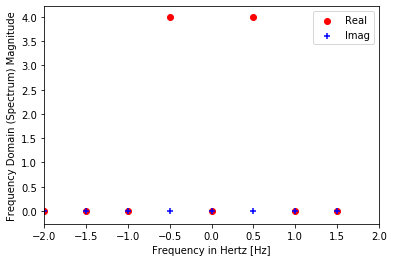

In [11]:

fig, ax = plt.subplots()
ax.scatter(freqs, X.real,c="r", label="Real")
ax.scatter(freqs, X.imag,c="b", marker="+", label="Imag")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [12]:
freqs

array([ 0. ,  0.5,  1. ,  1.5, -2. , -1.5, -1. , -0.5])

# References

* Numerical recipes in C
   * Cambridge University Press. 1997.
   * Press W.H., Teukolsky S.A., Vetterling W.T., Flannery B.P.

#### Physics with Nero

* Discrete Fourier Transform
  * https://www.youtube.com/watch?v=eZrbVlIQRTI

* The Fourier Series
  * https://www.youtube.com/watch?v=VxcsfveSEEg

* Using scipy fftpack fft
  * https://www.youtube.com/watch?v=6U226pAQixY

* Aliasing and the Nyquist Frequency
  * https://www.youtube.com/watch?v=VI98XaHhkQM

* Fourier Filtering and Smoothing
  * https://www.youtube.com/watch?v=kCSSHxOCKyA

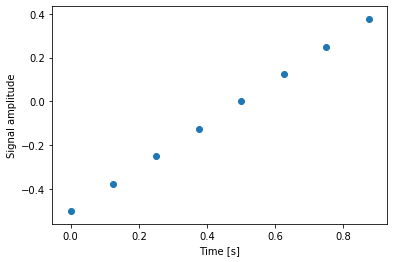

In [13]:
f = 1       # Frequency
f_s = 4   # Sampling rate: measurements per second

t = np.linspace(0, 1, 2*f_s, endpoint=False)
x = t - 0.5

fig, ax = plt.subplots()
ax.scatter(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(-2.0, 2.0)

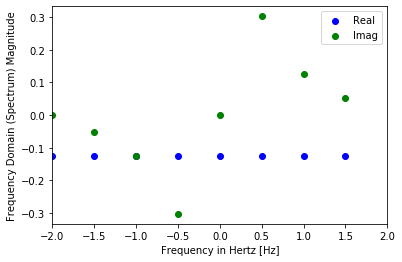

In [14]:
X = fft(x)
X = X * 2 / len(x)
freqs = fftfreq(len(x)) * f_s

fig, ax = plt.subplots()
ax.scatter(freqs, X.real,c="b", label="Real")
ax.scatter(freqs, X.imag,c="g", label="Imag")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

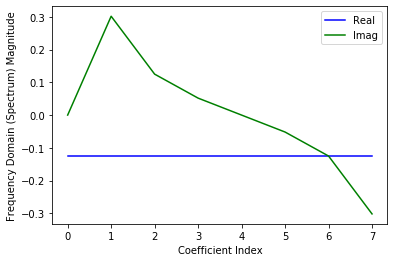

In [15]:
fig, ax = plt.subplots()
ax.plot( X.real,c="b", label="Real")
ax.plot( X.imag,c="g", label="Imag")
ax.legend(loc=0)

ax.set_xlabel('Coefficient Index')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

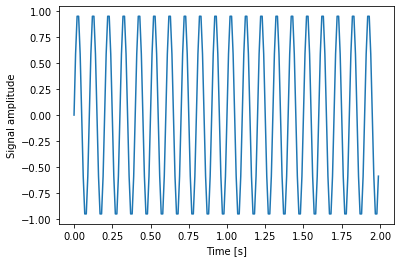

In [16]:
f = 10       # Frequency
f_s = 100   # Sampling rate: measurements per second

t = np.linspace(0, 2, 2*f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

In [17]:
X = fft(x)

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

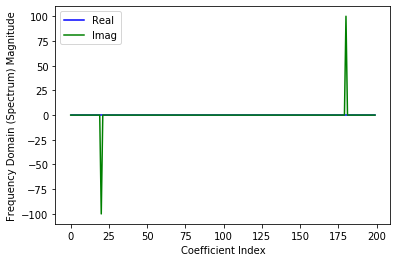

In [18]:
fig, ax = plt.subplots()
ax.plot( X.real,c="b", label="Real")
ax.plot( X.imag,c="g", label="Imag")
ax.legend(loc=0)

ax.set_xlabel('Coefficient Index')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

In [19]:
freqs = fftfreq(len(x)) * f_s

(-50.0, 50.0)

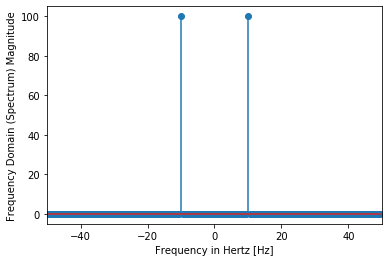

In [20]:
fig, ax = plt.subplots()
ax.stem(freqs, np.abs(X), use_line_collection=True)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [21]:
# individual signals

a1, f1 = 5, 10.
a2, f2 = 2, 20.
a3, f3 = 3, 30.

y1 =  a1 * np.sin( f1 * 2*np.pi * t)
y2 =  a2 * np.sin( f2 * 2*np.pi * t)
y3 =  a3 * np.cos( f3 * 2*np.pi * t)

t = np.linspace(0, 2, 2*f_s, endpoint=False)
y = y1 + y2 + y3

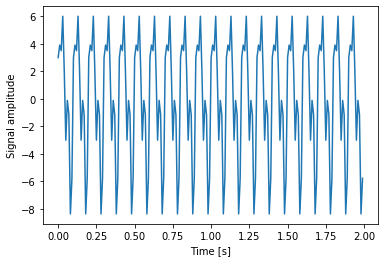

In [22]:
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(0, 0.5)

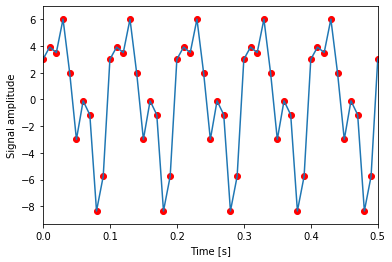

In [23]:
fig, ax = plt.subplots()
ax.plot(t, y)
ax.scatter(t, y, c="r")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
ax.set_xlim(0, 0.5)

(-50.0, 50.0)

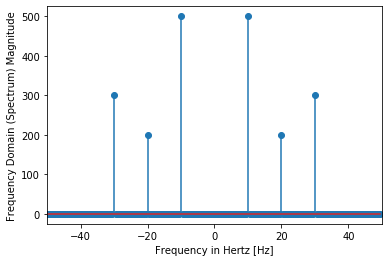

In [24]:
Y = fft(y)

freqs = fftfreq(len(y)) * f_s

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(Y), use_line_collection=True)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

(-50.0, 50.0)

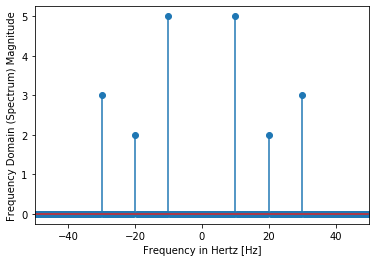

In [25]:
Y = fft(y)

freqs = fftfreq(len(y)) * f_s

Y = Y * 2 /len(y)    # Coefficient Normalization


fig, ax = plt.subplots()
ax.stem(freqs, np.abs(Y), use_line_collection=True)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)